In [ ]:
# Import các thư viện cần thiết
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from cvxopt import matrix, solvers

In [ ]:
# Cố định seed cho random
np.random.seed(6)

In [ ]:
# means: một list chứa 2 giá trị mean vector trong không gian 2 chiếu:
# [2, 2] cho class 1
# [4, 2] cho class -1
means = [[2, 2], [4, 2]]

In [19]:
# Tạo giá trị hiệp phương sai cho cả 2 class 1 và -1.
# 2 class đều định nghĩa phương sai và sự tương quan giữa 2 chiều là cov
cov = [[.3, .2], [.2, .3]]

In [20]:
# số điểm dữ liệu cho từng class - tổng là 2N điểm dữ liệu
N = 10

In [22]:
# Tạo các điểm dữ liệu bằng phân phối chuẩn (normal distribution)
# Không gian 2 chiều - 2 đặc trưng

# class 1: mean=[2, 2]
X0 = np.random.multivariate_normal(means[0], cov, N) #X0.shape = (2, N)

# class -1: mean=[4, 2]
X1 = np.random.multivariate_normal(means[1], cov, N) #X1.shape = (2, N)

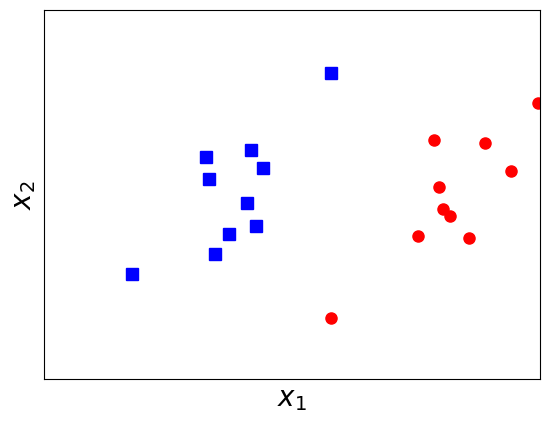

In [23]:
plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = 1)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = 1)
plt.axis('equal')
plt.ylim(0, 4)
plt.xlim(0, 5)

# hide tickss
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.show()

In [24]:
# combine các điểm dữ liệu bằng cách chuyển vị từng X_n ma trận shape (N, 2)
# concate theo axis = 1
X = np.concatenate((X0.T, X1.T), axis=1) #X.shape = (2, 2N)

In [25]:
# Tạo labels
y = np.concatenate((np.ones((1, N)), (-1) * np.ones((1, N))), axis=1) # y.shape = (1, 2N)

Với V:
$$
V = [y_1 x_1, y_2 x_2, ..., y_N x_N]
$$
Hàm đối ngẫu Lagrange:
$$
g(\lambda) = -\frac{1}{2} \lambda^T V^T V \lambda + 1^T \lambda
$$
Đặt:
$$
K = V^T V
$$
K là ma trận xác định dương. \\
Nhờ đó ta có được hàm concave:
$$
g(\lambda) = - \frac{1}{2} \lambda^T K \lambda + 1^T \lambda
$$

In [26]:
# Tạo vector V
V = np.concatenate((X0.T, -X1.T), axis = 1)

In [27]:
# Tạo K
K = matrix(V.T.dot(V))

 $$
 \lambda^* = \underset{\lambda}{\operatorname{argmax}} g(\lambda)
 $$
 Dạng Quadratic Programming:
 $$
 \lambda^* = \underset{\lambda}{\operatorname{argmin}} (-g(\lambda))
 = \underset{\lambda}{\operatorname{argmin}}(\frac{1}{2} \lambda^T K \lambda - 1^T \lambda)
 $$
 Subject to:
 $$
 \sum_{i=1}^{N} \lambda_i y_i = 0
 $$
  $$
  -\lambda_i \leq 0
 $$
$$
 ∀ i \in {1, 2,.., N}
$$

In [28]:
# q = -1^T
# P = K
# Gx <= h
# (1/2) x^T P x + p x
# sol = solvers.qp(P, p, G, h, A, b)

# lập ràng buộc cho \lambda
# -\lambda_i = 0
G = matrix(-np.eye(2*N))
h = matrix(np.zeros((2*N, 1)))

# lập ràng buộc cho \lambda_i y_i (tìm được nhờ đạo hàm w, b)
# A = \lambda_i y_i = 0
A = matrix(y)
b = matrix(np.zeros((1, 1)))

# p = (-1)^T
p = matrix(-np.ones((2*N, 1)))

solvers.options['show_progress'] = False
sol = solvers.qp(K, p, G, h, A, b)

In [30]:
# quan sát lambda
l = np.array(sol['x'])
print('lambda = ')
print(l.T)


lambda = 
[[1.77688496e-08 1.68215066e-08 2.53690033e-08 1.60542509e+00
  4.68022167e-08 5.29195517e-08 4.73849073e-08 1.51589827e-08
  1.79111937e-08 5.31531077e-08 1.38918813e-08 1.53345560e-08
  9.57385273e-09 1.89495438e-08 1.24087354e-08 3.24349190e-01
  1.37443182e-08 2.76601082e-08 1.28107604e+00 3.88097932e-08]]


In [31]:
# Chọn epsilon, vì đa số các \lambda_i = 0
epsilon = 1e-6
# Chọn các \lambda khác 0
S = np.where(l > epsilon)[0]

VS = V[:, S]
XS = X[:, S]
yS = y[:, S]
lS = l[S]

# Tính w dựa trên biểu thức đạo hàm Lagragian của bài toán
w = VS.dot(lS)

# Tính b bằng cách lấy trung bình các cách tính b
b = np.mean(yS.T - w.T.dot(XS))

print('w = ', w.T)
print('b = ', b)

w =  [[-1.54976884  0.89948154]]
b =  2.811187620746125


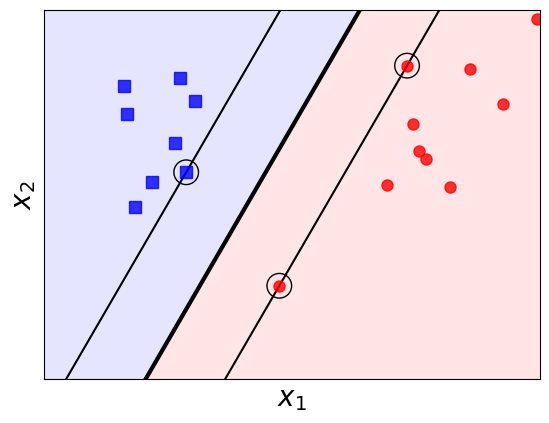

In [32]:
# Plot points
fig, ax = plt.subplots()

x1 = np.arange(-10, 10, 0.1)
y1 = -w[0, 0]/w[1, 0]*x1 - b/w[1, 0]
y2 = -w[0, 0]/w[1, 0]*x1 - (b-1)/w[1, 0]
y3 = -w[0, 0]/w[1, 0]*x1 - (b+1)/w[1, 0]

plt.plot(x1, y1, 'k', linewidth=3)
plt.plot(x1, y2, 'k')
plt.plot(x1, y3, 'k')

y4 = 10*x1
plt.plot(x1, y1, 'k')
plt.fill_between(x1, y1, color='red', alpha=0.1)
plt.fill_between(x1, y1, y4, color='blue', alpha=0.1)

plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize=8, alpha=0.8)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize=8, alpha=0.8)

plt.axis('equal')
plt.ylim(0, 3)
plt.xlim(2, 4)

# Hide ticks
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

# Add circles around support vectors
for m in S:
    circle = plt.Circle((X[0, m], X[1, m]), 0.1, color='k', fill=False)
    ax.add_artist(circle)

plt.xlabel('$x_1$', fontsize=20)
plt.ylabel('$x_2$', fontsize=20)

# Display the plot
plt.show()